In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def load_std_to_arrays(filename: str):
    # Load the CSV into a DataFrame
    df = pd.read_csv(filename)

    # Convert columns back into three separate arrays using column numbers
    array1 = df.iloc[:, 0:2].to_numpy()
    array2 = df.iloc[:, 2:4].to_numpy()

    return array1, array2

def load_var_to_arrays(filename: str):
    # Load the CSV into a DataFrame
    df = pd.read_csv(filename)

    # Convert columns back into three separate arrays using column numbers
    array1 = df.iloc[:, 0:2].to_numpy()
    array2 = df.iloc[:, 2:4].to_numpy()
    array3 = df.iloc[:, 4:6].to_numpy()

    return array1, array2, array3

# Return arrays for std and var
stdGRUtest_actual, stdGRUtest_preds = load_std_to_arrays('../Deterministic/StandardGRUTest.csv')
vGRUtest_actual, vGRUtest_mean, vGRUtest_sigma = load_var_to_arrays('../Variational/vGRUTest.csv')

# Verify the shape
print(stdGRUtest_actual.shape)
print(stdGRUtest_preds.shape)
print(vGRUtest_actual.shape)
print(vGRUtest_mean.shape)  
print(vGRUtest_sigma.shape)  

(6144, 2)
(6144, 2)
(6144, 2)
(6144, 2)
(6144, 2)


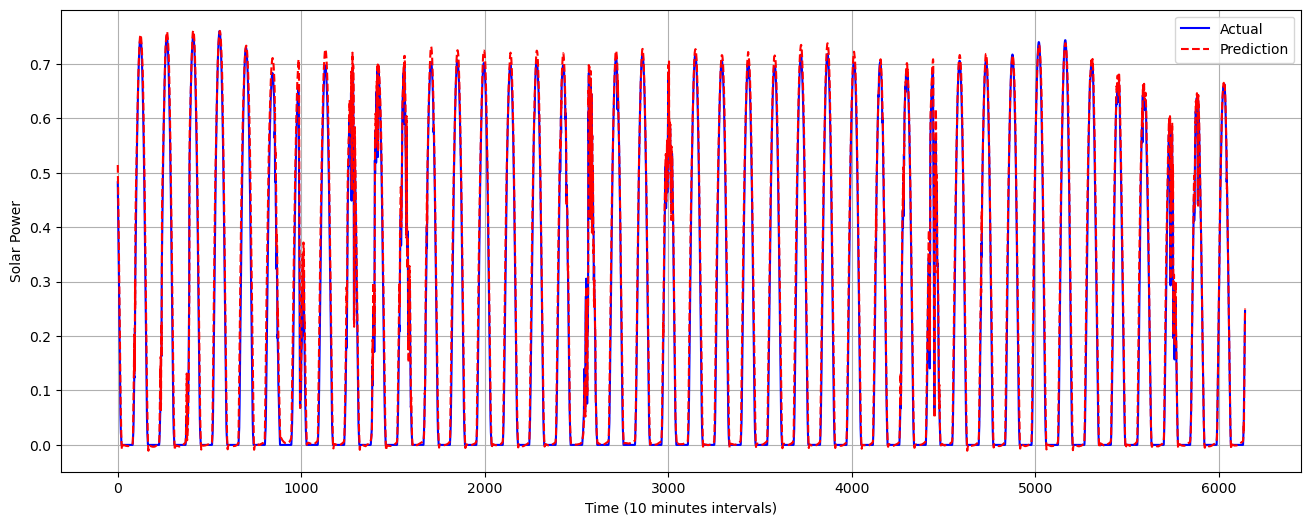

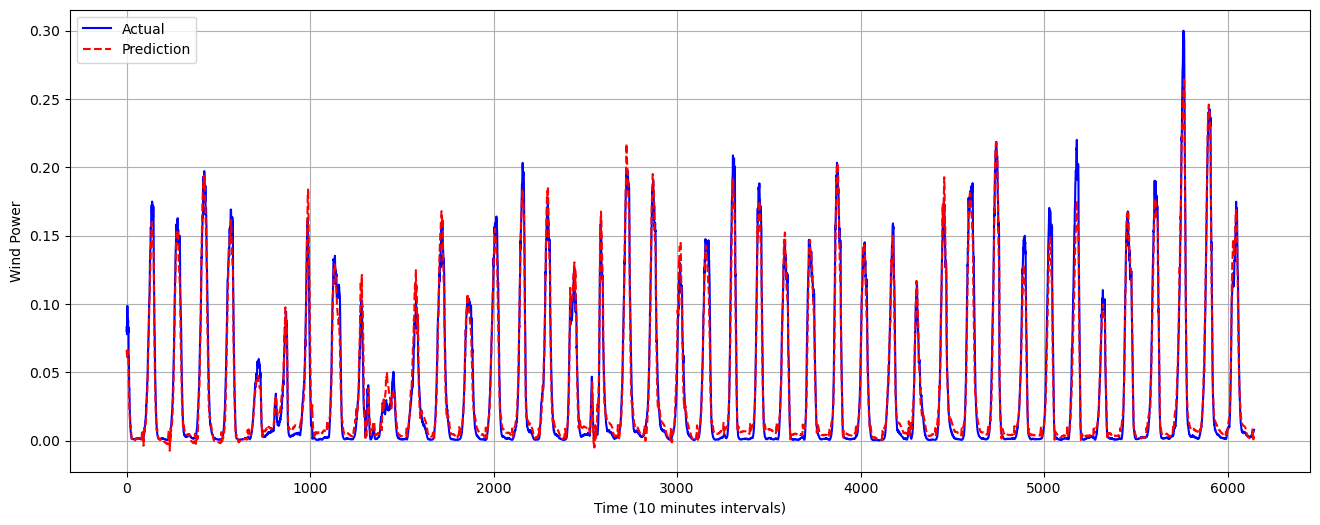

In [6]:
labels = ['Solar Power', 'Wind Power']

# Plot predictions vs actuals
for i, label in zip(range(0,2), labels):
    plt.figure(figsize=(16,6))
    plt.plot(stdGRUtest_actual[:, i], label='Actual', linestyle='-', color='blue')
    plt.plot(stdGRUtest_preds[:, i], label='Prediction', color='r', linestyle='--')
    
    plt.ylabel(label)
    plt.xlabel('Time (10 minutes intervals)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
labels = ['Solar Power', 'Wind Power']

def plot_variational(true_values, mean_predictions, ci, output_index, mean_color, ci_color):   
    # Plot predicted mean
    plt.plot(mean_predictions[:, output_index], label='vGRU Mean', color=mean_color, linestyle='--', linewidth=1)
    
    # Plot confidence intervals (mean +/- confidence interval)
    plt.fill_between(
        np.arange(mean_predictions.shape[0]),
        mean_predictions[:, output_index] - ci[:, output_index],
        mean_predictions[:, output_index] + ci[:, output_index],
        color=ci_color, alpha=0.2, label='vGRU 95% Confidence Interval'
    )

    plt.ylabel(labels[output_index])
    plt.xlabel('Time (10 minute intervals)')
    plt.legend()
    plt.grid(True)
    

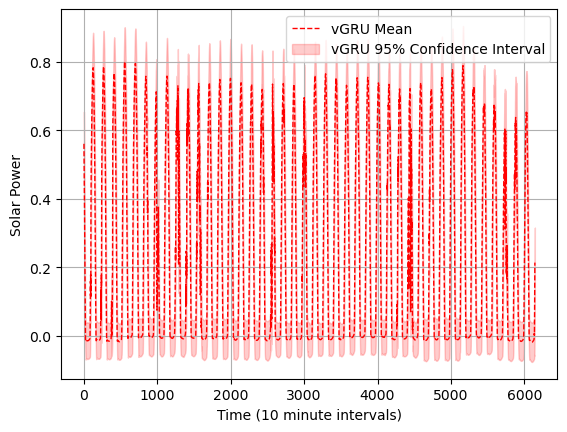

In [8]:
plot_variational(vGRUtest_actual, vGRUtest_mean, vGRUtest_sigma, 0, 'r', 'r')

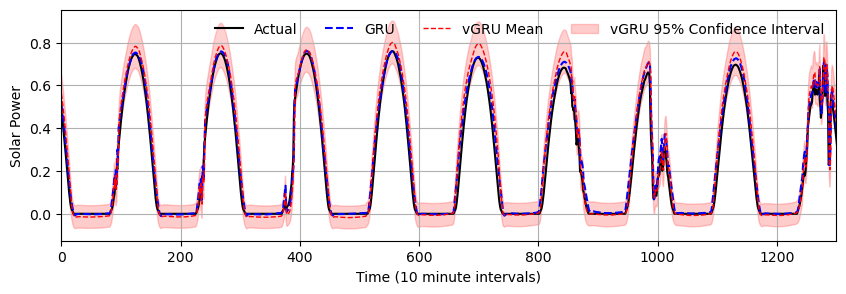

In [11]:
# Plot predictions vs actuals
for i, label in zip(range(0,1), labels):
    plt.figure(figsize=(10,3))
    
    plt.plot(stdGRUtest_actual[:, i], label='Actual', linestyle='-', color='k')
    plt.plot(stdGRUtest_preds[:, i], label='GRU', color='b', linestyle='--')

    plot_variational(vGRUtest_actual, vGRUtest_mean, vGRUtest_sigma, 0, 'r', 'r')
    
    plt.ylabel(label)
    plt.xlabel('Time (10 minute intervals)')
    plt.legend(loc='upper right', framealpha=0.1, ncol=4)
    plt.grid(True)
    plt.xlim(0, 1300)
    plt.savefig("GRU_test_preds_solar.png", dpi=300, bbox_inches='tight')
    plt.show()

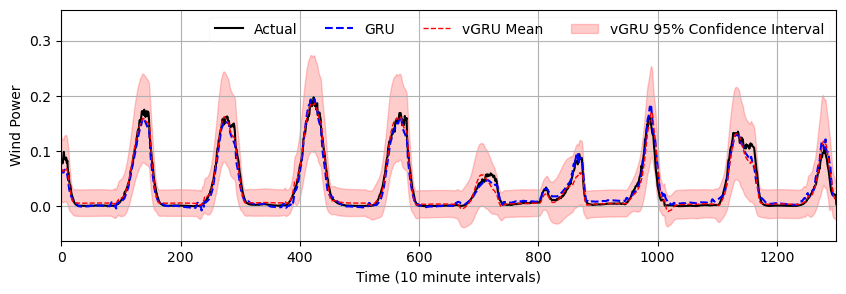

In [12]:
# Plot predictions vs actuals
for i, label in zip(range(1,2), labels):
    plt.figure(figsize=(10,3))
    
    plt.plot(stdGRUtest_actual[:, i], label='Actual', linestyle='-', color='k')
    plt.plot(stdGRUtest_preds[:, i], label='GRU', color='b', linestyle='--')

    plot_variational(vGRUtest_actual, vGRUtest_mean, vGRUtest_sigma, 1, 'r', 'r')
    
    plt.ylabel('Wind Power')
    plt.xlabel('Time (10 minute intervals)')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 1300)
    plt.legend(loc='upper right', framealpha=0.1, ncol=4)
    plt.savefig("GRU_test_preds_windREVISION.png", dpi=300, bbox_inches='tight')
    plt.show()